# 알고리즘 트레이딩 연습하기 - 가상화폐 (업비트)
- Upbit Guide : https://docs.upbit.com/reference/

In [115]:
import os
import jwt
import uuid
import hashlib
from urllib.parse import urlencode
import requests

import pandas as pd
import matplotlib.pyplot as plt
import pyupbit
import mplfinance as mpf

from func import viz_candle

## API key 
- 개인 계정으로 Open API 발급을 마친 후 발급된 API key를 로드함 <보안에 유의>
- secret key는 최초 1회에 한해 발급되며 추가적으로 확인이 불가하니 별도로 보관 필수

In [201]:
keys = pd.read_csv('./key/key.txt', sep=',', header=0)
access_key = keys.loc[keys['key'] == 'access_key', 'value'][0]
secret_key = keys.loc[keys['key'] == 'secret_key', 'value'][1]
server_url = 'https://api.upbit.com'

API 주소
- 전체 계좌 조회 : https://api.upbit.com/v1/accounts
- 주문 가능 정보 : https://api.upbit.com/v1/orders/chance
- 주문하기 :       https://api.upbit.com/v1/orders  

## 전체 계좌 조회
- 보유한 자산 리스트 보여줌 : https://api.upbit.com/v1/accounts

In [206]:
payload = {
    'access_key': access_key,
    'nonce': str(uuid.uuid4()),
}

jwt_token = jwt.encode(payload, secret_key)
authorize_token = 'Bearer {}'.format(jwt_token)
headers = {"Authorization": authorize_token}

res_accounts = requests.get(server_url + "/v1/accounts", headers=headers)
res_accounts = pd.DataFrame(res_accounts.json())
display(res_accounts)
display(pd.read_csv('./key/meta_accounts.txt', sep='\t'))

,currency,balance,locked,avg_buy_price,avg_buy_price_modified,unit_currency
0,KRW,0.77497831,0.0,0,True,KRW
1,BTC,0.00149124,0.0,45570000,False,KRW
2,ONT,0.2640402,0.0,1112.5,False,KRW
3,ONG,0.07046073,0.0,353.6054,False,KRW
4,ALGO,26.7280943,0.0,2545,False,KRW


,필드,설명,타입
0,currency,화폐를 의미하는 영문 대문자 코드,String
1,balance,주문가능 금액/수량,NumberString
2,locked,주문 중 묶여있는 금액/수량,NumberString
3,avg_buy_price,매수평균가,NumberString
4,avg_buy_price_modified,매수평균가 수정 여부,Boolean
5,unit_currency,평단가 기준 화폐,String


## 마켓별 주문 가능 정보를 확인
- 주문 가능 정보 : https://api.upbit.com/v1/orders/chance

In [208]:
query = {
    'market': 'KRW-BTC',
}
query_string = urlencode(query).encode()

m = hashlib.sha512()
m.update(query_string)
query_hash = m.hexdigest()

payload = {
    'access_key': access_key,
    'nonce': str(uuid.uuid4()),
    'query_hash': query_hash,
    'query_hash_alg': 'SHA512',
}

jwt_token = jwt.encode(payload, secret_key)
authorize_token = 'Bearer {}'.format(jwt_token)
headers = {"Authorization": authorize_token}

res_chance = requests.get(server_url + "/v1/orders/chance", params=query, headers=headers)
res_chance = res_chance.json()
display(res_chance)
display(pd.read_csv('./key/meta_chance.txt', sep='\t'))

{'bid_fee': '0.0005',
 'ask_fee': '0.0005',
 'maker_bid_fee': '0.0005',
 'maker_ask_fee': '0.0005',
 'market': {'id': 'KRW-BTC',
  'name': 'BTC/KRW',
  'order_types': ['limit'],
  'order_sides': ['ask', 'bid'],
  'bid': {'currency': 'KRW', 'price_unit': None, 'min_total': '5000.0'},
  'ask': {'currency': 'BTC', 'price_unit': None, 'min_total': '5000.0'},
  'max_total': '1000000000.0',
  'state': 'active'},
 'bid_account': {'currency': 'KRW',
  'balance': '0.77497831',
  'locked': '0.0',
  'avg_buy_price': '0',
  'avg_buy_price_modified': True,
  'unit_currency': 'KRW'},
 'ask_account': {'currency': 'BTC',
  'balance': '0.00149124',
  'locked': '0.0',
  'avg_buy_price': '45570000',
  'avg_buy_price_modified': False,
  'unit_currency': 'KRW'}}

,필드,설명,타입
0,bid_fee,매수 수수료 비율,NumberString
1,ask_fee,매도 수수료 비율,NumberString
2,market,마켓에 대한 정보,Object
3,market.id,마켓의 유일 키,String
4,market.name,마켓 이름,String
5,market.order_types,지원 주문 방식,Array[String]
6,market.order_sides,지원 주문 종류,Array[String]
7,market.bid,매수 시 제약사항,Object
8,market.bid.currency,화폐를 의미하는 영문 대문자 코드,String
9,market.bit.price_unit,주문금액 단위,String


## 전체 코인 리스트 (원화)
- 업비트에서 거래 가능한 마켓 목록

In [219]:
import requests
url = "https://api.upbit.com/v1/market/all"
querystring = {"isDetails":"false"}
headers = {"Accept": "application/json"}
response = requests.request("GET", url, headers=headers, params=querystring)
coin_list = pd.DataFrame(response.json())
coin_list['type'] = [x[:3] for x in coin_list.market]
coin_list['name'] = [x[4:] for x in coin_list.market]
coin_list = coin_list[coin_list.type == 'KRW'].reset_index(drop = True)
display(coin_list)
display(pd.read_csv('./key/meta_market.txt', sep='\t'))

,market,korean_name,english_name,type,name
0,KRW-BTC,비트코인,Bitcoin,KRW,BTC
1,KRW-ETH,이더리움,Ethereum,KRW,ETH
2,KRW-NEO,네오,NEO,KRW,NEO
3,KRW-MTL,메탈,Metal,KRW,MTL
4,KRW-LTC,라이트코인,Litecoin,KRW,LTC
...,...,...,...,...,...
106,KRW-1INCH,1인치네트워크,1inch Network,KRW,1INCH
107,KRW-ALGO,알고랜드,Algorand,KRW,ALGO
108,KRW-NEAR,니어프로토콜,NEAR Protocol,KRW,NEAR
109,KRW-WEMIX,위믹스,Wemix,KRW,WEMIX


,필드명,설명,타입
0,market,업비트에서 제공중인 시장 정보,String
1,korean_name,거래 대상 암호화폐 한글명,String
2,english_name,거래 대상 암호화폐 영문명,String


## 개별 코인 가격 확인

In [211]:
pyupbit.get_current_price(['KRW-BTC'])

53337000.0

## 캔들차트 (ohlcv)
- open : 시가
- high : 고가
- low : 저가
- close : 종가
- volume : 거래량

In [258]:
btc_5m = pyupbit.get_ohlcv('KRW-BTC', interval="minute5", count= 1000)
btc_1y = pyupbit.get_ohlcv('KRW-BTC', interval='day', count=365)
display(btc_5m)
display(btc_1y)

,open,high,low,close,volume,value
2022-02-06 13:20:00,50910000.0,50947000.0,50888000.0,50946000.0,12.071739,6.148304e+08
2022-02-06 13:25:00,50946000.0,51000000.0,50890000.0,50975000.0,16.113456,8.210175e+08
2022-02-06 13:30:00,50983000.0,50983000.0,50913000.0,50943000.0,11.120260,5.666440e+08
2022-02-06 13:35:00,50943000.0,50967000.0,50888000.0,50966000.0,15.349124,7.815322e+08
2022-02-06 13:40:00,50966000.0,50970000.0,50920000.0,50950000.0,6.298031,3.209364e+08
...,...,...,...,...,...,...
2022-02-10 00:15:00,53275000.0,53298000.0,53174000.0,53174000.0,33.625041,1.789569e+09
2022-02-10 00:20:00,53174000.0,53262000.0,53103000.0,53175000.0,24.912149,1.324503e+09
2022-02-10 00:25:00,53201000.0,53311000.0,53174000.0,53283000.0,18.947201,1.008819e+09
2022-02-10 00:30:00,53278000.0,53399000.0,53227000.0,53332000.0,17.488969,9.326825e+08


,open,high,low,close,volume,value
2021-02-10 09:00:00,48788000.0,49781000.0,47350000.0,48550000.0,11588.864998,5.645873e+11
2021-02-11 09:00:00,48550000.0,51800000.0,48074000.0,51370000.0,12305.592677,6.146268e+11
2021-02-12 09:00:00,51370000.0,52280000.0,50237000.0,50836000.0,8911.898307,4.577599e+11
2021-02-13 09:00:00,50836000.0,51757000.0,50258000.0,50626000.0,7055.123455,3.593134e+11
2021-02-14 09:00:00,50625000.0,53380000.0,50403000.0,52706000.0,11364.084019,5.936442e+11
...,...,...,...,...,...,...
2022-02-05 09:00:00,50613000.0,51488000.0,50216000.0,50788000.0,5618.422204,2.854418e+11
2022-02-06 09:00:00,50788000.0,52022000.0,50400000.0,51732000.0,4046.196215,2.066614e+11
2022-02-07 09:00:00,51678000.0,54110000.0,51084000.0,53511000.0,6414.990458,3.375537e+11
2022-02-08 09:00:00,53511000.0,55321000.0,52325000.0,53651000.0,10799.768389,5.788453e+11


In [249]:
def viz_candle(price_hist, type = 'candle', title = '') :
    import mplfinance as mpf
    import copy
    df = copy.deepcopy(price_hist)

    col_map = {"open": "Open",
               "high": "High",
               "low": "Low",
               "close": "Close",
               "volume": "Volume"}
    
    df.rename(columns=col_map, inplace=True)
    
    colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
    style = mpf.make_mpf_style(marketcolors=colorset)
    mpf.plot(df, type=type, volume=True, style=style, datetime_format = '%Y-%m-%d %H:%M', title = title)

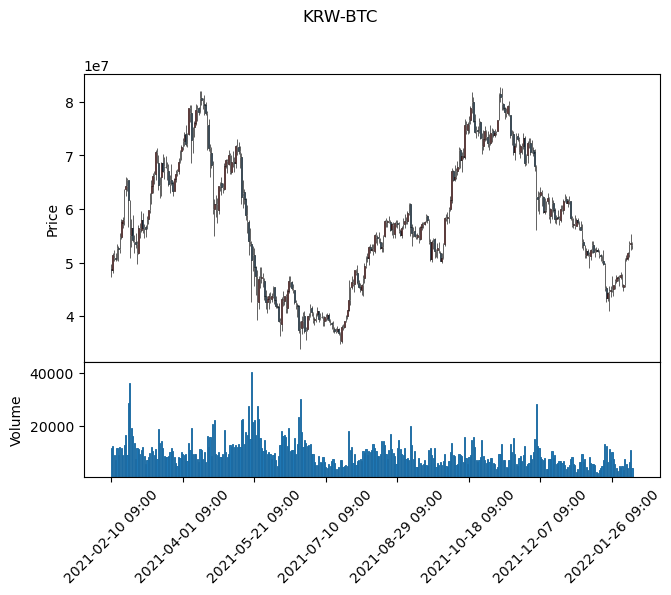

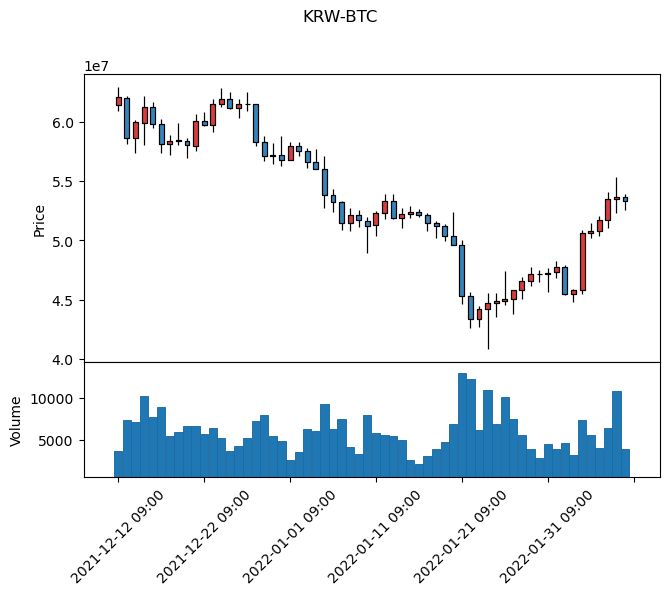

In [266]:
market = 'KRW-BTC'
viz_candle(btc_1y, type = 'candle', title = market)
viz_candle(btc_1y[-60:], type = 'candle', title = market)

## 전체 코인별 과거 1년치 일별 주가

In [264]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1년 일별 주가
coin_table = []
for i in range(len(coin_list)):
    market = coin_list.iloc[i].market    
    df_day = pyupbit.get_ohlcv(market, interval='day', count=365)
    # df_day = pyupbit.get_ohlcv(market, interval="minute5", count= 1000)
    df_day['market'] = coin_list.iloc[i].market
    df_day['korean_name'] = coin_list.iloc[i].korean_name
    df_day['english_name'] = coin_list.iloc[i].english_name
    df_day = df_day.reset_index()
    coin_table.append(df_day)    
    # 개별 코인 스케일링
    min_max_scaler = MinMaxScaler()
    x_min_max_scaler = min_max_scaler.fit_transform(np.array(df_day['close']).reshape(-1, 1))
    df_day['close_scaler'] = x_min_max_scaler
    
coin_table = pd.concat(coin_table)
coin_table['date'] = [x[:10] for x in coin_table['index'].astype(str)]
coin_table['return'] = (coin_table['close'] - coin_table['open'])/coin_table['open']*100
coin_table

,index,open,high,low,close,volume,value,market,korean_name,english_name,close_scaler,date,return
0,2021-02-10 09:00:00,48788000.0,49781000.0,47350000.0,48550000.0,1.158886e+04,5.645873e+11,KRW-BTC,비트코인,Bitcoin,0.287323,2021-02-10,-0.487825
1,2021-02-11 09:00:00,48550000.0,51800000.0,48074000.0,51370000.0,1.230559e+04,6.146268e+11,KRW-BTC,비트코인,Bitcoin,0.348497,2021-02-11,5.808445
2,2021-02-12 09:00:00,51370000.0,52280000.0,50237000.0,50836000.0,8.911898e+03,4.577599e+11,KRW-BTC,비트코인,Bitcoin,0.336913,2021-02-12,-1.039517
3,2021-02-13 09:00:00,50836000.0,51757000.0,50258000.0,50626000.0,7.055123e+03,3.593134e+11,KRW-BTC,비트코인,Bitcoin,0.332357,2021-02-13,-0.413093
4,2021-02-14 09:00:00,50625000.0,53380000.0,50403000.0,52706000.0,1.136408e+04,5.936442e+11,KRW-BTC,비트코인,Bitcoin,0.377478,2021-02-14,4.110617
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,2022-02-07 09:00:00,7740.0,7845.0,7410.0,7760.0,1.143145e+07,8.737881e+10,KRW-WEMIX,위믹스,Wemix,0.577137,2022-02-07,0.258398
28,2022-02-08 09:00:00,7755.0,8370.0,7225.0,8310.0,3.143648e+07,2.486303e+11,KRW-WEMIX,위믹스,Wemix,0.699223,2022-02-08,7.156673
29,2022-02-09 09:00:00,8300.0,9970.0,7860.0,8480.0,7.712958e+07,6.788512e+11,KRW-WEMIX,위믹스,Wemix,0.736959,2022-02-09,2.168675
0,2022-02-08 09:00:00,84900.0,113400.0,84900.0,105350.0,3.305726e+06,3.504862e+11,KRW-AVAX,아발란체,Avalanche,0.000000,2022-02-08,24.087161


Text(0.5, 1.0, '365days')

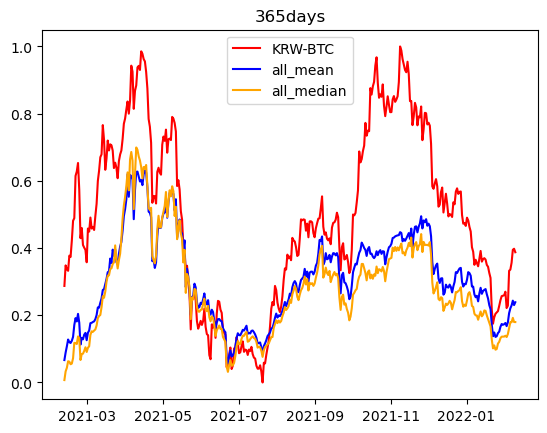

In [265]:
plt.plot(coin_table[coin_table.market == 'KRW-BTC'].groupby(['index'])['close_scaler'].min(), color = 'red')
plt.plot(coin_table[coin_table.market != 'KRW-BTC'].groupby(['index'])['close_scaler'].mean(), color = 'blue')
plt.plot(coin_table[coin_table.market != 'KRW-BTC'].groupby(['index'])['close_scaler'].median(), color = 'orange')
plt.legend(['KRW-BTC','except_btc_mean','except_btc_median'])
plt.title('365days')